In [1]:
import numpy as np
import random
import gym

## Environment - Taxi-v3

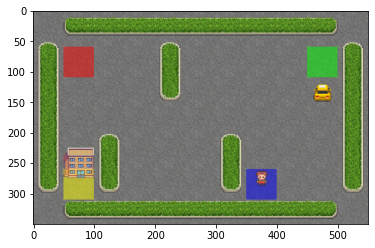

In [2]:
import time
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

env = gym.make('Taxi-v3', render_mode='rgb_array')
state = env.reset()
done = False

for _ in range(20):
    plt.imshow(env.render())
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    # Pick random action
    action = env.action_space.sample()
    state, reward, done, _, __ = env.step(action)
env.close()

## Q-Learning Algorithm

### Initialize Q-Table and count array

In [3]:
def initialize_Q_table(env):
    """
    For the given environment, the possible actions are integers from 0-5, 
    and the possible states are integers from 0-499.
    Therefore, the Q-Value of, for example, taking action 3 in state 156 can be found as Q[156, 3]
    """
    return np.zeros([env.observation_space.n, env.action_space.n])


### Define epsilon-greedy policy

In [4]:
# Pick action following epsilon-greedy policy
def get_epsilon_greedy_action(Q, state, epsilon):
    
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    
    return np.argmax(Q[state])



### Define steps to follow by agent during an episode

In [5]:
def execute_episode(Q, max_timesteps, epsilon):
    
    # Initialize Rewards historic
    
    
    state_trajectory = []
    action_trajectory = []
    reward_trajectory = []
    
    # Reset environment
    state, _ = env.reset()
    action = get_epsilon_greedy_action (Q, state,epsilon)
    
    
    for _ in range(max_timesteps):
        
        # Pick action following epsilon-greedy policy
        new_state, reward, done, info, _ = env.step(action)
        new_action = get_epsilon_greedy_action (Q, new_state,epsilon)
        # Perform action and receive new state S' and reward R
        
        state_trajectory.append(state)
        action_trajectory.append(action)
        reward_trajectory.append(reward)
        
        state = new_state
        action = new_action
        
        if done:
            break
            
    return Q, sum(reward_trajectory), state_trajectory, action_trajectory, reward_trajectory
        

### Train Agent

In [6]:
step_size = 0.05
discount_factor = 0.9
n_episodes = 60000
n_steps = 500



def compute_cum_rewards(discount_factor, t, rewards):
    """Cumulative reward function"""
    cum_reward = 0
    for tau in range(t, len(rewards)):
        cum_reward += discount_factor ** (tau - t) * rewards[tau]
    return cum_reward

env = gym.make('Taxi-v3').env
rewards_history = list()

def train_q_learning(epsilon):
    
    Q = initialize_Q_table(env)

    for episode in range(n_episodes):
        print(f'Training on Episode {episode+1}... Epsilon: {epsilon}', end="\r")

        Q, reward, state_traject, action_traject, reward_traject  = execute_episode(Q, n_steps, epsilon)
        
        rewards_history.append(reward)

        # update q table
        for t in range(len(reward_traject)):

            reward = reward_traject[t]
            action = action_traject[t]
            state = state_traject[t]

            cum_reward = compute_cum_rewards(discount_factor, t, reward_traject) + reward
            Q[state, action] += step_size * (cum_reward - Q[state, action])
    
    return Q, rewards_history
    

In [7]:
trained_Q, rewards_history = train_q_learning(0.1)  # e-greedy



### Evaluate Agent's performance

#### Rewards history

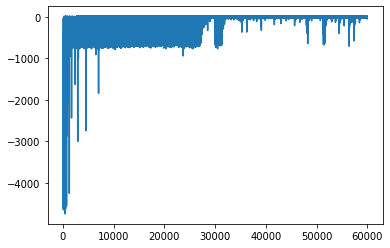

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(n_episodes), rewards_history)
plt.show()

#### Visualization of the Trained Agent

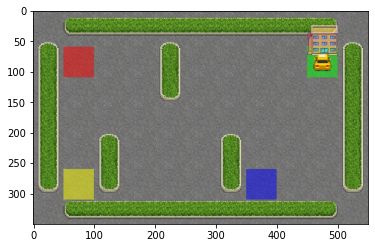

In [9]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
state, _ = env.reset()
done = False

while not done:
    
    plt.imshow(env.render())
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    # Pick random action
    action = np.argmax(trained_Q[state])
    state, reward, done, _, __ = env.step(action)
env.close()

In [10]:
def execute_episodes_on_trained_agent(Q, n_episodes):
    
    episode_rewards = dict()
    for episode in range(n_episodes):
        print(f'Executing Episode {episode+1}...')
        
        # Initialize historics
        rewards = list()

        state, _ = env.reset()

        done = False
        n_steps = 0

        while not done:

            action = np.argmax(Q[state])

            state, reward, done, _, _ = env.step(action)
            rewards.append(reward)
            n_steps += 1
            
        episode_rewards[episode] = (sum(rewards), n_steps)
        print(f'Episode {episode+1} took {n_steps} steps, and got a reward of {sum(rewards)}\n')

    return episode_rewards

In [11]:
n_test_episodes = 10
trained_agent_rewards = execute_episodes_on_trained_agent(trained_Q, n_test_episodes)

avg_steps = sum([episode_info[1] for episode_info in trained_agent_rewards.values()])/n_test_episodes
avg_reward = sum([episode_info[0] for episode_info in trained_agent_rewards.values()])/n_test_episodes

print('\n\n')
print('Average number of timesteps per episode: ', avg_steps)
print('Average reward per episode: ', avg_reward)

Executing Episode 1...
Episode 1 took 13 steps, and got a reward of 8

Executing Episode 2...
Episode 2 took 11 steps, and got a reward of 10

Executing Episode 3...
Episode 3 took 16 steps, and got a reward of 5

Executing Episode 4...
Episode 4 took 12 steps, and got a reward of 9

Executing Episode 5...
Episode 5 took 17 steps, and got a reward of 4

Executing Episode 6...
Episode 6 took 11 steps, and got a reward of 10

Executing Episode 7...
Episode 7 took 15 steps, and got a reward of 6

Executing Episode 8...
Episode 8 took 17 steps, and got a reward of 4

Executing Episode 9...
Episode 9 took 9 steps, and got a reward of 12

Executing Episode 10...
Episode 10 took 13 steps, and got a reward of 8




Average number of timesteps per episode:  13.4
Average reward per episode:  7.6
